# Машинное обучение

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [119]:
import numpy as np

Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [120]:
def max_element(arr):
    zero = arr==0;
    print (arr[1:][zero[:-1]].max());
newArray=np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]);
max_element(newArray);   

5


Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [121]:
def nearest_value(X, v):
    # Your code here
    deviations = np.abs(X - v)
    return X[np.where(deviations == np.min(deviations))][0]
x= np.arange(0,10).reshape((2, 5)) 
v=3.6
nearest_value(x, v )

4

Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [122]:
def scale(X):
    stds = X.std(axis=1)
    if len(np.nonzero(stds==0)[0]):
        return "DIVISION BY ZERO!!!"
    means = X.mean(axis=1)
    Y = X - means
    Y /= stds
    return Y

sample_matrix = np.array([np.random.randint(0, 100, 2) for i in range(2)])

print(sample_matrix)
print(scale(sample_matrix))

[[ 6 98]
 [22 47]]
[[-1.          5.08      ]
 [-0.65217391  1.        ]]


 Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [123]:
from numpy import linalg as la
def get_stats(X):
    print("DET: ", np.linalg.det(X))
    print("TRACE: ", np.trace(X))
    print("MAX: ", X.max())
    print("MIN: ", X.min())
    print("MATRIX NORM: ", np.linalg.norm(X))
    print("EIGENVALS: ", np.linalg.eig(X)[0])
    print("INVERSE: ", np.linalg.inv(X))
    # Your code here
    
X = np.array([np.random.normal(10, 1, 2) for i in range(2)])
print(X)
get_stats(X)

[[ 8.30920336 10.61416393]
 [ 9.05660037 10.39398635]]
DET:  -9.762494678375822
TRACE:  18.703189710038366
MAX:  10.614163931291058
MIN:  8.309203358019596
MATRIX NORM:  19.281086560064846
EIGENVALS:  [-0.5081628  19.21135251]
INVERSE:  [[-1.06468548  1.0872389 ]
 [ 0.92769325 -0.85113525]]


Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [124]:
vals = np.empty(100)
for exp_num in range(100):
    x1 = np.random.normal(0, 1, (10, 10))
    x2 = np.random.normal(0, 1, (10, 10))
    vals[exp_num] = np.max(x1.dot(x2))
    
print("MEAN: ", np.average(vals))
print("95% quantile: ", np.percentile(vals, 95))

MEAN:  8.78812620267872
95% quantile:  11.871878633522872


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

In [125]:
import pandas as pd
%matplotlib inline

Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [126]:
data = pd.read_csv('2008.csv')

In [127]:
grouped = data.groupby("CancellationCode")
grouped.sum()["Cancelled"]

CancellationCode
A    563
B    549
C    299
Name: Cancelled, dtype: int64

Ответ:  __A = carrier__

 Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [128]:
dataframe = pd.read_csv("2008.csv")
dists = data["Distance"]
print ("Max: = ", dists.max())
print ("Average: = ", dists.mean())
print ("Min: = ", dists.min())

Max: =  4962
Average: =  724.5082571428571
Min: =  31


 Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [129]:
susp_flight_info = data[data.Distance == 31][["FlightNum", "Month", "DayofMonth"]]
susp_flight_nums = susp_flight_info["FlightNum"].unique()
print("Подозрительные:")
print(susp_flight_info, "\n")
print("Они же в другие дни:")
for flight in susp_flight_nums:
        print("FLIGHT # ", flight, "\n", data[(data['FlightNum'] == susp_flight_nums[1]) &
                                                                   (data['Distance'] != 31)][['Distance', 'Month', 'DayofMonth']], "\n")

Подозрительные:
       FlightNum  Month  DayofMonth
1116          65     12          30
6958          65     12          26
17349         64      8          18
27534         64      3          11
46082         65      8           9
48112         64      2          28 

Они же в другие дни:
FLIGHT #  65 
        Distance  Month  DayofMonth
501         533      3          20
1389        680      3          13
2619       2381      5          23
3869         82      7           1
4025       1005      6          15
4466        123      6          29
6778        359      7          12
7891       2381      4           6
7977       1747      7           9
8448        123      2          10
9615        533      1           4
10833       372      3          31
12352      1747      1          14
12980        82      8           6
13155      1747      7           2
21304      1005      5          13
24750       680      8          21
25671       533      1          15
26323      1005     12       

Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [130]:
IATA_code = data.groupby('Origin').size().idxmax()
airports = pd.read_csv('airports.csv') # http://stat-computing.org/dataexpo/2009/supplemental-data.html
print(IATA_code, "находится в городе ", airports[airports['iata'] == IATA_code]['city'].values)

ATL находится в городе  ['Atlanta']


Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [131]:
time_mean = data[['Origin', 'AirTime' ]].groupby('Origin').mean()
print("Аэропорт с интентификатором ", time_mean['AirTime'].idxmax())

Аэропорт с интентификатором  SJU


Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [132]:
threshold = 1000
all_flights = data.groupby("Origin").size()
delayed_flights = data[data["DepDelay"] > 0].groupby("Origin").size()
fraction_delayed = delayed_flights[all_flights > threshold] / all_flights[all_flights > threshold]
max_fraction_delayed = fraction_delayed.idxmax()
print (fraction_delayed.max())
airports[airports["iata"] == max_fraction_delayed]

0.5111591072714183


,iata,airport,city,state,country,lat,long
1436,EWR,Newark Intl,Newark,NJ,USA,40.692497,-74.168661


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [133]:
data = pd.read_csv('2008.csv')
print("Пропущенные значения имеются:", data.isnull().values.any())
print("В таблице объект-признак пропущено", data.isnull().values.sum(), "значений")
print(np.count_nonzero(np.array(data.isnull().values.sum(axis=1))), "объектов имеют хотя бы 1 пропуск")
print(np.count_nonzero(np.array(data.isnull().values.sum(axis=0))), "признаков имеют хотя бы 1 пропуск")

Пропущенные значения имеются: True
В таблице объект-признак пропущено 355215 значений
70000 объектов имеют хотя бы 1 пропуск
16 признаков имеют хотя бы 1 пропуск


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной? **ДА**
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [134]:
print(data['DepDelay'].isnull().sum(), 'пропущенных значений в целевой переменной')

1399 пропущенных значений в целевой переменной


Посмотрим на объекты, у которых нет ответа, заметим, что у этих объектов в признаке Cancelled единицы, проверим, так ли это для всех объектов:

In [135]:
sum(data[data['DepDelay'].isnull()]['Cancelled'] < 1)

0

Дествительно, все объекты с отсутствующим ответом были отменены, проверим, работает ли это в обратную сторону

In [136]:
data[(data['DepDelay'].isnull()==False) & (data['Cancelled']==1)]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
5976,2008,11,29,6,1325.0,1301,NaN,...,A,0,NaN,NaN,NaN,NaN,NaN
15680,2008,12,19,5,954.0,935,NaN,...,B,0,NaN,NaN,NaN,NaN,NaN
16382,2008,12,6,6,1806.0,1728,NaN,...,B,0,NaN,NaN,NaN,NaN,NaN
20622,2008,10,7,2,844.0,845,NaN,...,A,0,NaN,NaN,NaN,NaN,NaN
22462,2008,12,17,3,2132.0,2134,NaN,...,B,0,NaN,NaN,NaN,NaN,NaN
30057,2008,12,9,2,1358.0,1330,NaN,...,B,0,NaN,NaN,NaN,NaN,NaN
33611,2008,10,11,6,826.0,830,NaN,...,A,0,NaN,NaN,NaN,NaN,NaN
37581,2008,12,3,3,2234.0,2235,NaN,...,B,0,NaN,NaN,NaN,NaN,NaN
40343,2008,11,10,1,1440.0,1445,NaN,...,A,0,NaN,NaN,NaN,NaN,NaN
50401,2008,11,29,6,2232.0,2234,NaN,...,B,0,NaN,NaN,NaN,NaN,NaN




Для 12 объектов не выполнено обратное, то есть они были отменены, но вылетели из аэропорта, при этом они не прилетели, так как ArrDelay = NaN, но они и не 
были перенаправлены в другой аэропорт, а ActualElapsedTime - время от поднятия шасси до реального приземления неизвестно. Значит, их сбили (как только они подняли шасси).
Но даже если это ошибки в данных, то признак Cancelled можно удалить, так как он будет иметь 12 единиц с учетом удаления оъектов без ответа, это не будет информативным

  __Вывод:__ удаляем __Cancelled = 1__

In [137]:
data.drop(['Cancelled','CancellationCode'], axis=1, inplace=True)

In [138]:
data_1 = data[(data['DepDelay'].isnull()==False) & (data['DepDelay']!=0)]

In [139]:
data_1.shape

(63404, 27)

In [140]:
data_x = data_1[data_1.columns.difference(['DepDelay'])]

In [141]:
data_x.shape

(63404, 26)

In [142]:
#Выделим отдельно целевую переменную:

In [143]:
data_y  = data_1['DepDelay']

In [144]:
data_y.shape

(63404,)

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [145]:
for col in ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']:
    data_x[col+'_Hour'] = data_x[col]//100
    data_x[col+'_Minute'] = data_x[col]%100
    data_x.drop([col], axis=1, inplace=True)

In [146]:
data_x.head()

,ActualElapsedTime,AirTime,ArrDelay,CRSElapsedTime,CarrierDelay,DayOfWeek,DayofMonth,...,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,57.0,46.0,8.0,65.0,NaN,3,18,...,11.0,20,55,23.0,8.0,23,0
1,124.0,108.0,2.0,138.0,NaN,3,4,...,26.0,14,10,17.0,30.0,17,28
2,138.0,125.0,-19.0,155.0,NaN,7,3,...,43.0,11,45,15.0,1.0,15,20
3,102.0,79.0,-12.0,111.0,NaN,3,23,...,41.0,11,44,13.0,23.0,13,35
4,148.0,136.0,-17.0,160.0,NaN,7,4,...,15.0,8,20,12.0,43.0,13,0


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [147]:
#Посмотрим, какие признаки сильно коррелируют с целевой переменной

Populating the interactive namespace from numpy and matplotlib


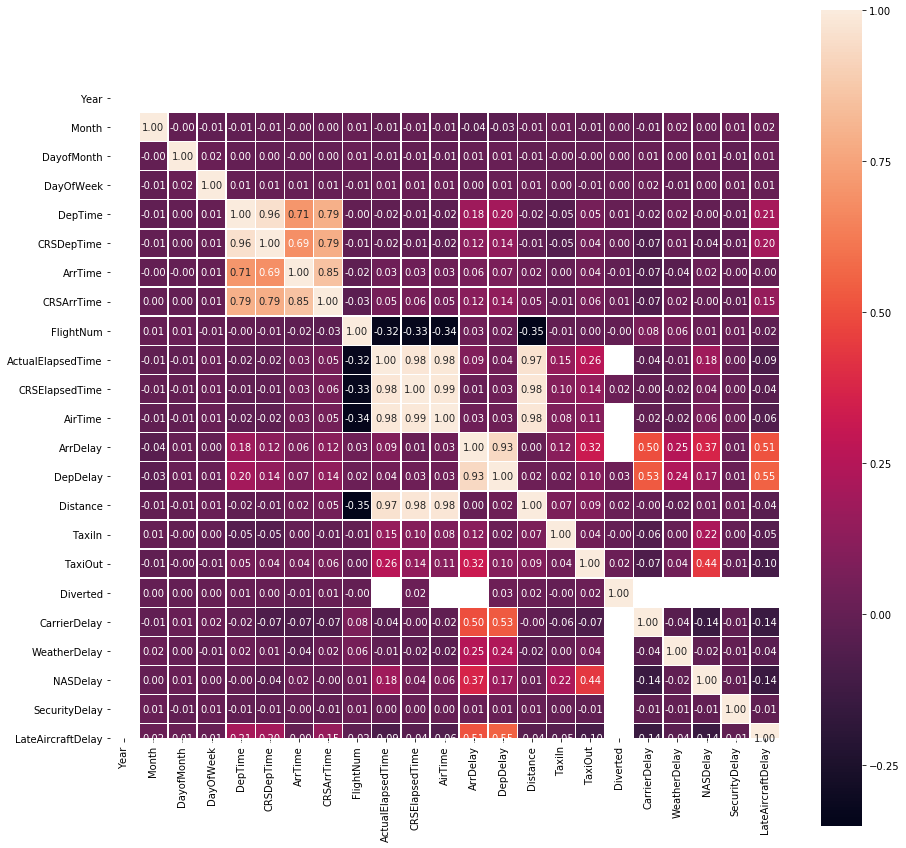

In [148]:
%pylab inline
import seaborn as sns
corr = data_1.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True, fmt=".2f", square=True, linewidths=.5,  ax=ax)

In [149]:
#Наиболее кореллирующими признаками являются

In [150]:
corr_DepDelay = corr.loc['DepDelay',:]
corr_DepDelay[corr_DepDelay > 0.4]

ArrDelay             0.933526
DepDelay             1.000000
CarrierDelay         0.532696
LateAircraftDelay    0.553806
Name: DepDelay, dtype: float64

Посмотрим на таймлайн переменных

<img src="timeline.png" width="800" height="800">

[Источник](http://www.galitshmueli.com/sites/galitshmueli.com/files/FlightDelays.pdf)

In [151]:
data_1[(data_1['TaxiOut']> data_1['DepDelay']) & (data_1['DepDelay']>0)][['DepDelay', 'TaxiOut', 'DepTime',
                                                                          'CRSDepTime']].head()

,DepDelay,TaxiOut,DepTime,CRSDepTime
17,1.0,65.0,1951.0,1950
25,1.0,10.0,901.0,900
43,8.0,19.0,648.0,640
44,5.0,13.0,1735.0,1730
51,14.0,46.0,1416.0,1402


Но по нашим данным TaxiOut не входит DepDelay, получается, что в нашем случае DepDelay = DepTime - CRSDepTime

Логично предположить, что в момент предсказания мы находимся до вылета самолета и не знаем ни информацию после взлета, ни информацию о времени реального 
отправления - только расписание (иначе модель бессмысленна) 

Очевидно, что все переменные после __Wheels-off time__ мы не можем использовать, так как они не известны в момент нашего предсказания или не влияют на нашу переменную:
- ActualElapsedTime - после вылета
- CRSElapsedTime - не влияет
- AirTime - после вылета
- ArrDelay - после вылета
- Year - не нужен 
- ArrTime_Hour - после вылета
- ArrTime_Minute - после вылета
- TaxiIn - после вылета
- TailNum - не нужен 
- LateAircraftDelay - не можем знать до того, как произошло 
- WeatherDelay - не можем знать до того, как произошло 
- CarrierDelay - не можем знать до того, как произошло 
- Diverted - узнается в процессе полета и не влияет на задержку при вылете
- NASDelay - не можем знать до того, как произошло 
- SecurityDelay - не можем знать до того, как произошло 
- TaxiOut - по данным происходит после задержки, так что не влияет на DepDelay
- DepTime_Hour - не можем знать до того, как произошло 
- DepTime_Minute - не можем знать до того, как произошло
- ArrTime_Hour - не можем знать до того, как произошло
- ArrTime_Minute - не можем знать до того, как произошло

In [152]:
# Исходя из вышесказанного получаем следующий набор данных

In [153]:
X = data_x[['DayOfWeek', 'DayofMonth', 'Dest', 'Distance',  'FlightNum', 'Month', 'Origin','UniqueCarrier',
            'CRSDepTime_Hour', 'CRSDepTime_Minute','CRSArrTime_Hour','CRSArrTime_Minute']]

In [154]:
X.head()

,DayOfWeek,DayofMonth,Dest,Distance,FlightNum,Month,Origin,UniqueCarrier,CRSDepTime_Hour,CRSDepTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,3,18,CLE,307,242,6,MDW,WN,20,55,23,0
1,3,4,AVL,834,2380,6,IAH,XE,14,10,17,28
2,7,3,TPA,997,1769,8,MDW,WN,11,45,15,20
3,3,23,FCA,532,3802,1,SLC,OO,11,44,13,35
4,7,4,AUS,1090,399,5,LAS,WN,8,20,13,0


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

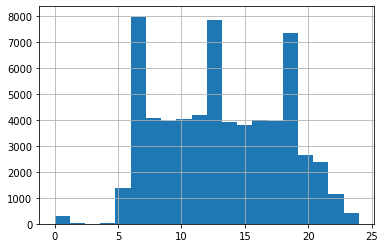

In [155]:
data_x['DepTime_Hour'].hist(bins=20)

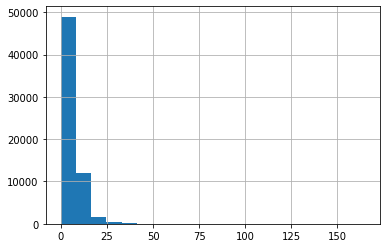

In [156]:
data_x['TaxiIn'].hist(bins=20)

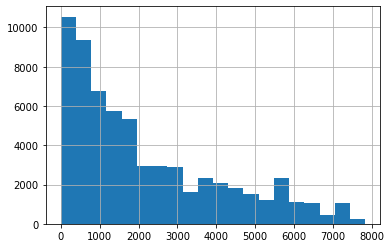

In [157]:
data_x['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

<font color='navy'> __Проблема__ - разные единицы измерения, следовательно разный разброс переменных, поэтому без масштабирования их нельзя сравнивать. Кроме того, это нужно для градиентного спуска, который мы будем использовать для обучения. Если признаки имеют разный масштаб, то на разных признаках веса будут обновляться с разной скоростью. Масштабирование ускорит сходимость алгоритма. </font>

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [158]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 15)

In [159]:
def transform_data(data):
    ss = StandardScaler()
    for col in data.columns:
        if data[col].dtype.name == 'object':
            data[col].fillna('nan', inplace = True)
        else:
            data[col].fillna(0, inplace = True)
            data[col]= ss.fit_transform(data[col].values.reshape(-1, 1)).flatten('F')
    data = pd.get_dummies(data)
    return data 

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [160]:
X_trasf = transform_data(X)
print(X_trasf.shape[1], "признака после преобразования")

623 признака после преобразования


<font color='blue'> В исходных переменных Destination, Origin, Unique Carrier было  много уникальных значений, поэтому one-hot-encoding создал огромное количество бинарных признаков из них. Попробуем уменьшить число признаков. 

<font color='blue'>Логика отбора: можно усреднить значения задержек по всем аэропортам отбытия для Origin, аэропортам прибытия для Dest, перевозчикам для UniqueCarrier. Ещё лучше посчитать не среднее, а медиану задержек вылета по аэропортам, чтобы выбросы не влияли на результат. Ожидается, что аэропорты, в которых чаще остальных задерживают рейсы, будут иметь медиану выше медианы по всей выборке. 

<font color='blue'>Значение медианы или среднего не показательно для тех аэропортов, по которым мало наблюдений, и бинарные переменные, кодирующие такие аэропорты, лучше просто исключить из числа признаков, потому что оценки по ним будут неточными.</font>

In [161]:
X_trasf.head()

,DayOfWeek,DayofMonth,Distance,FlightNum,Month,CRSDepTime_Hour,CRSDepTime_Minute,...,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
0,-0.462767,0.256485,-0.744130,-0.991600,-0.118281,1.512432,1.586498,...,0,0,0,0,1,0,0
1,-0.462767,-1.332050,0.183961,0.106546,-0.118281,0.214011,-0.936014,...,0,0,0,0,0,1,0
2,1.541454,-1.445517,0.471018,-0.207284,0.467662,-0.435199,1.025940,...,0,0,0,0,1,0,0
3,-0.462767,0.823819,-0.347886,0.836931,-1.583137,-0.435199,0.969884,...,0,1,0,0,0,0,0
4,1.541454,-1.332050,0.634799,-0.910960,-0.411252,-1.084410,-0.375456,...,0,0,0,0,1,0,0


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trasf, data_y, test_size=0.3, random_state=42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [163]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [164]:
X_train_2, y_train_2 = X_train[:1000], y_train[:1000]
LinReg = LinearRegression()
LinReg.fit(X_train_2, y_train_2)
pr_train_LinReg = LinReg.predict(X_train_2)
pr_test_LinReg = LinReg.predict(X_test)

In [165]:
print('-------Train-------')
print('MSE %0.4f \nR2    %0.4f ' %(mse(y_train_2, pr_train_LinReg), r2_score(y_train_2, pr_train_LinReg)))
print('-------Test-------')
print('MSE %0.4f \nR2    %0.4f ' %(mse(y_test, pr_test_LinReg), r2_score(y_test, pr_test_LinReg)))

-------Train-------
MSE 690.8600 
R2    0.3481 
-------Test-------
MSE 3772405228171833865404416.0000 
R2    -2820133628894426169344.0000 


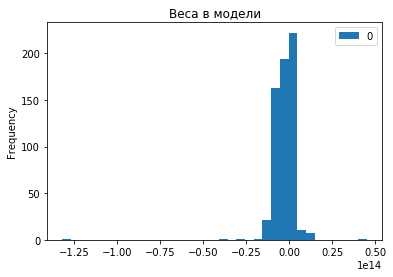

In [166]:
pd.DataFrame(LinReg.coef_).plot.hist(bins=35)
plt.title('Веса в модели');

In [167]:
LinReg.coef_

array([ 8.70809958e-01,  6.57452540e-01,  6.11508936e-01,  8.33314002e-01,
       -5.53564808e-01,  7.71911065e+00, -9.43284712e-01, -1.05591977e+00,
        2.55085255e+00, -1.83419941e+12, -1.83419941e+12, -1.83419941e+12,
       -1.31941441e+14,  1.08652986e+13,  4.51057517e+13, -1.83419941e+12,
        1.43358759e+13, -3.71435478e+13, -2.75516178e+13, -1.83419941e+12,
        9.18651210e+12,  5.75290614e+12, -1.83419941e+12, -1.83419941e+12,
       -1.83419941e+12,  9.12721080e+12, -1.83419941e+12, -1.83419941e+12,
       -1.83419941e+12,  3.97218635e+12,  6.41729197e+12, -1.83419941e+12,
       -1.83419941e+12, -1.03658402e+13, -1.83419941e+12, -1.32999743e+11,
        1.21202863e+13, -1.83419941e+12,  2.27323613e+12, -1.83419941e+12,
        9.87543208e+12, -6.25176277e+12, -1.83419941e+12, -1.83419941e+12,
       -1.83419941e+12, -1.83419941e+12, -5.18329322e+12, -1.83419941e+12,
        7.37549972e+12, -1.83419941e+12,  1.21760411e+13,  4.54553866e+11,
        5.17393609e+11, -

__ВЫВОД:__

   <font color='blue'>На тестовой выборке получили огромную MSE и сильно отрицательный $R^2$. Метрика r2_score может быть отрицательной, так как модель может быть "сколь угодно плоха" - в 
сравнении с моделью с одной константой, что дает $R^2$ = 0. То есть наша модель хуже предсказания среднего значения. Возможно, среднее тестовой выборки сильно отличается 
от среднего на обучающей, поэтому  просто предсказание среднего тестовой выборки намного лучше, то есть ошибка намного меньше, чем у нашей модели. </font>

  <font color='blue'>Если модель адекватно работает на тренировочной, но хуже, чем бесполезна на тестовой, это значит, что существует проблема переобучения. Об этом свидетельствую 
экстремальные веса в модели - при таком большом количестве признаков модель теряет обобщающую способность, так как подстраивается под тренировочные данные, 
минимизируюя на них MSE, при этом коэффициенты в основном очень большие. </font>

<font color='blue'>Регуляризация как раз вводит штраф за большие веса модели, тем самым заставляя её меньше подстраиваться под тренировочные данные и сохранять обобщающую способность. </font>


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18. (0.5 балла)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [168]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold

In [169]:
LassReg = LassoCV(alphas=np.linspace(0.01, 100, num=1000), cv=KFold(n_splits=5,random_state=42))
LassReg.fit(X_train_2, y_train_2)
pr_train_LassReg = LassReg.predict(X_train_2)
pr_test_LassReg = LassReg.predict(X_test)

In [170]:
LassReg.coef_

array([ 0.        ,  0.14977813,  0.73600924,  0.11622887, -0.6530681 ,
        5.44399428,  0.        ,  0.        ,  1.06151939,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.  

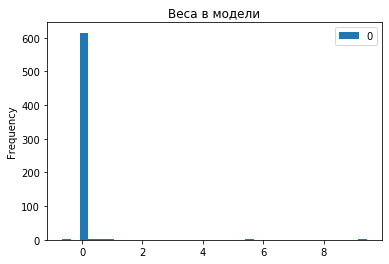

In [172]:
pd.DataFrame(LassReg.coef_).plot.hist(bins=35)
plt.title('Веса в модели');

In [173]:
LassReg.alpha_

0.41036036036036033

In [174]:
print('-------Train-------')
print('MSE %0.4f \nR2     %0.4f ' %(mse(y_train_2, pr_train_LassReg), r2_score(y_train_2, pr_train_LassReg)))
print('-------Test-------')
print('MSE %0.4f \nR2     %0.4f ' %(mse(y_test, pr_test_LassReg), r2_score(y_test, pr_test_LassReg)))

-------Train-------
MSE 1006.7691 
R2     0.0501 
-------Test-------
MSE 1316.3999 
R2     0.0159 


In [175]:
RidgeReg = RidgeCV(alphas=np.linspace(0.01, 150, num=100), cv=KFold(n_splits=5,random_state=42))
RidgeReg.fit(X_train_2, y_train_2)
pr_train_RidgeReg = RidgeReg.predict(X_train_2)
pr_test_RidgeReg = RidgeReg.predict(X_test)

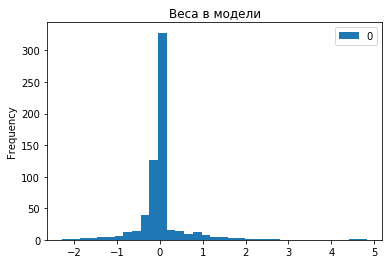

In [178]:
pd.DataFrame(RidgeReg.coef_).plot.hist(bins=35)
plt.title('Веса в модели');

In [176]:
RidgeReg.coef_

array([ 2.12532400e-01,  5.64604054e-01,  1.14281567e+00,  4.79208763e-01,
       -9.14402180e-01,  4.82606226e+00, -1.82435175e-02,  7.46580505e-01,
        1.30860125e+00,  8.79407046e-01, -1.53591809e-01, -1.83568173e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.13300320e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.12459251e-01,
        0.00000000e+00,  0.00000000e+00,  6.95170110e-02, -7.04885037e-02,
        1.49167447e-01,  0.00000000e+00,  1.64111891e+00, -4.03550007e-01,
       -1.54884545e-01,  0.00000000e+00,  0.00000000e+00, -9.05179407e-02,
       -6.75599475e-01,  0.00000000e+00, -1.85222488e-01,  0.00000000e+00,
        0.00000000e+00, -1.24331712e-01,  0.00000000e+00,  1.52102524e-01,
        0.00000000e+00,  0.00000000e+00, -2.91577155e-02, -4.44932423e-01,
        9.80666155e-02,  1.95595504e+00,  0.00000000e+00, -1.83877373e-01,
        0.00000000e+00,  2.61925809e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [179]:
RidgeReg.alpha_

116.6688888888889

In [180]:
print('-------Train-------')
print('MSE %0.4f \nR2     %0.4f ' %(mse(y_train_2, pr_train_RidgeReg), r2_score(y_train_2, pr_train_RidgeReg)))
print('-------Test-------')
print('MSE %0.4f \nR2     %0.4f ' %(mse(y_test, pr_test_RidgeReg), r2_score(y_test, pr_test_RidgeReg)))

-------Train-------
MSE 971.6110 
R2     0.0832 
-------Test-------
MSE 1307.2449 
R2     0.0227 


__ВЫВОД:__

<font color='blue'>На тестовой выборке обе модели показали более высокую MSE и существенно более низкий $R^2$, однако на тестовой выборке MSE в обоих случаях улучшилась, при этом $R^2$ стал положительный, хотя и близкий к 0. Можно сделать вывод, что хотя модель и оставется бесполезной, уже нельзя сказать, что она хуже модели с константой (предсказания среднего). При этом и на тренировочной и на тестовой Ridge показывает себя немного лучше.  </font>

<font color='blue'>Если посмотреть на веса, то можно увидеть, что Lasso занулила почти коэффициенты почти при всех признаках, кроме нескольких (отобрала признаки), а RidgeReg стянула к 0 все коэффициенты, не давая модели тем самым переобучаться так сильно. </font>

------------------

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19. (0 баллов)** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [181]:
X_train['C'] = 1
X_test['C'] = 1

In [182]:
X_train.head()

,DayOfWeek,DayofMonth,Distance,FlightNum,Month,CRSDepTime_Hour,CRSDepTime_Minute,...,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,C
47629,1.541454,-0.310849,1.066264,0.136336,0.174690,-0.651603,-0.655735,...,0,0,0,1,0,0,1
39632,1.541454,-1.218584,-0.391913,2.143612,1.053604,-0.651603,1.025940,...,0,0,0,0,0,0,1
46373,0.038288,-0.651249,-0.659598,1.822592,-1.583137,0.646818,-0.375456,...,0,0,0,0,0,0,1
42942,0.038288,0.710352,2.557903,-1.110249,-0.411252,-0.435199,-0.543623,...,0,0,0,0,0,0,1
44966,-0.963823,1.618087,0.442841,-0.590453,1.639547,1.079625,-1.440516,...,0,0,0,0,0,0,1


**20. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [253]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    return np.dot(X,w)

In [254]:
X = np.array([[1, 1], [2,2]])
w = np.array([1,2])
make_pred(X, w)

array([3, 6])

In [339]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    Li = (y-make_pred(X, w))/y
    return np.dot(Li,Li)/y.shape[0]

In [340]:
X = np.array([[1, 1], [2,2], [3,3]])
w = np.array([1,1])
y = np.array([1,1,1])
get_func(w, X, y)

11.666666666666666

In [305]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    l1 = (y-make_pred(X, w))/y
    L = np.dot(X.T, l1/y)
    return -2*L/y.shape[0]

In [306]:
X = np.array([[1, 1], [2,2], [3,3]])
w = np.array([1,1])
y = np.array([1,1,1])
get_grad(w, X, y)

array([14.66666667, 14.66666667])

In [309]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    Li = (y-make_pred(X, w))/y
    return np.dot(Li,Li)/y.shape[0]+np.dot(w,w)

In [310]:
X = np.array([[1, 1], [2,2], [3,3]])
w = np.array([1,1])
y = np.array([1,1,1])
get_reg_func(w, X, y)

13.666666666666666

In [313]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    return get_grad(w, X, y) + 2 * w  

In [314]:
X = np.array([[1, 1], [2,2]])
w = np.array([1,1])
y = np.array([1,1])
get_reg_grad(w, X, y)

array([9., 9.])

**21. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [116]:
def grad_descent(X, y, w0, step_size, max_iter=1000, eps=0.0001, is_reg=False):
    w_old, w_new = w0, w0
    L = [get_reg_func(w_old, X, y)] if is_reg else [get_func(w_old, X, y)]
    iteration = 0
    while iteration < max_iter and np.linalg.norm(w_old-w_new)>eps if iteration>0 else True:
        #print('iter=', iteration, 'L=', L[iteration], 'norm=', np.linalg.norm(w_old-w_new))
        w_old = w_new
        iteration += 1
        if is_reg:
            w_new = w_old - step_size*get_reg_grad(w_old, X, y)
            L.append(get_reg_func(w_new, X, y))
            
        else:
            w_new = w_old - step_size*get_grad(w_old, X, y)
            L.append(get_func(w_new, X, y))
    return w_new, L

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

__Возьмем те же первые 1000 наблюдений для ускорения выполнения алгоритма и посмотрим на сходимость при разных параметрах:__

Помимо указанных в задании значений шага я добавил значение шага равное 1.3. 

In [315]:
X_train_2, y_train_2 = X_train[:1000], y_train[:1000]
w0rand = numpy.random.rand(X_train_2.shape[1])

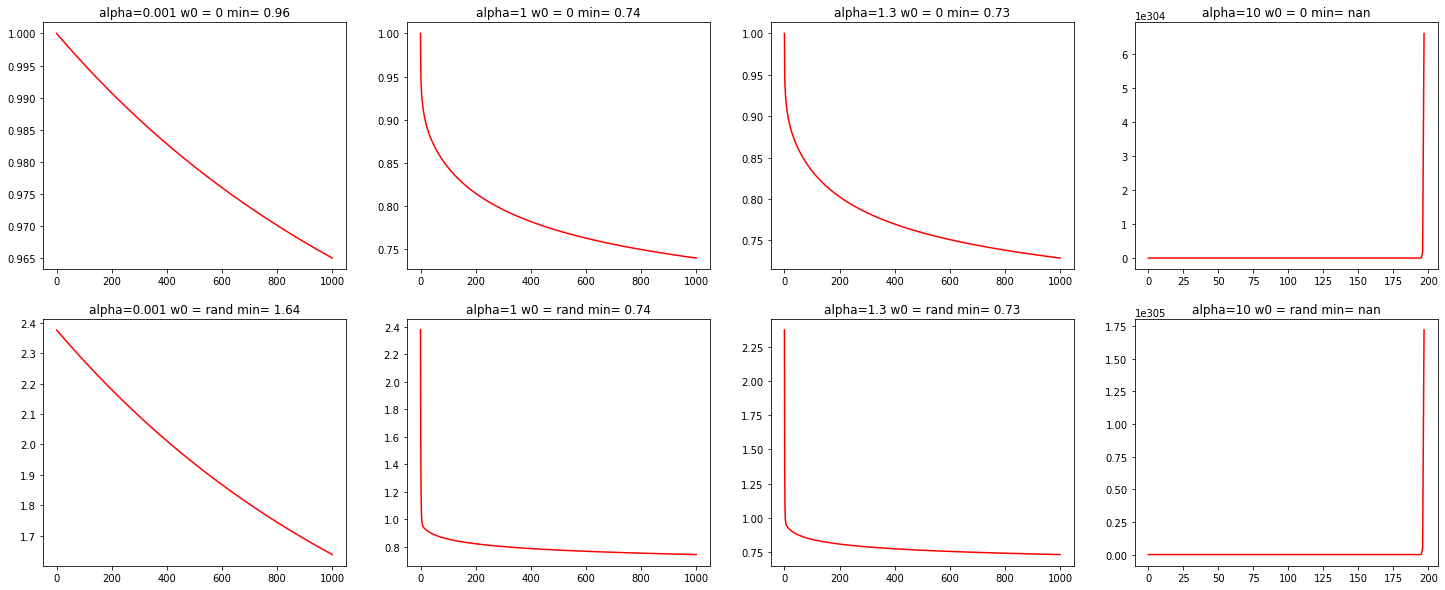

In [316]:
fig = plt.figure(figsize=(25,10))
for i, alpha in enumerate([0.001, 1, 1.3, 10, 0.001, 1, 1.3, 10]):   
    ax = fig.add_subplot(2, 4, i+1)
    if i < 4:
        w_opt, Loss = grad_descent(X_train_2, y_train_2, np.zeros(X_train_2.shape[1]), alpha, 1000, 0.0001, False)
        Lmin = "{:.2f}".format(np.min(Loss)) 
        ax.set_title('alpha=' + str(alpha) + " w0 = 0" + ' min= ' + Lmin)
        plt.plot(range(len(Loss)), Loss, c="r")
    else: 
        w_opt, Loss = grad_descent(X_train_2, y_train_2, w0rand , alpha, 1000, 0.0001, False)
        Lmin = "{:.2f}".format(np.min(Loss)) 
        ax.set_title('alpha=' + str(alpha) + " w0 = rand" + ' min= ' + Lmin)
        plt.plot(range(len(Loss)), Loss, c="r")

__Вывод:__

<font color='blue'> Параметры, конечно, влияют на сходимость.  </font>

<font color='blue'> Рассмотрим случай, когда веса инициализируются нулями (верхние графики), в этом случае при маленьких значениях альфа (0.001) алгоритм сходится очень медленно, для больших значений альфа (10) алгоритм моментально расходится (если посмотреть на значения функционала потерь, то он из единицы начинает сразу расти в бесконечность), то есть оптимальный параметр скорости обучения альфа где-то в окрестности 1.5-2.  </font>  

<font color='blue'> Рассмотрим случай, когда веса инициализируются случайными величинами, взятыми из равномерного на [0,1] распределения (нижние графики). Поведение алгоритма при различных параметрах альфа такое же, как и в первом случае. Однако стоит отметить, что такая инициализация изменяет схождение алгоритма. Для альфа около 1 алгоритм также сходится примерно к тому же значению функционала потерь к 1000-ой итерации (что и с нулевыми весами), хотя и начинает с большего значения. Для меньших альфа схождение существенно хуже, так как скорость сильно меньше и он не успевает сходиться к тому же уровню, что и алгоритм с нулевыми начальными весами. При больших альфа алгоритм также расходится.  </font>

**22. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

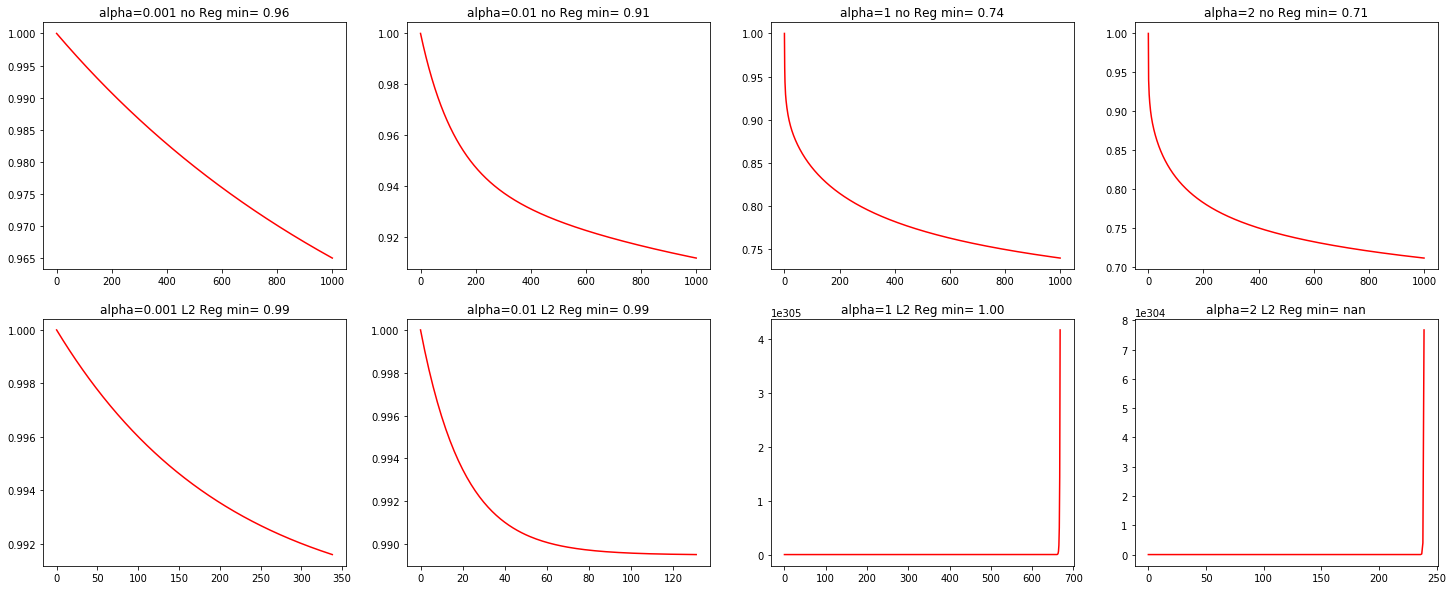

In [317]:
fig = plt.figure(figsize=(25,10))
for i, alpha in enumerate([0.001, 0.01, 1, 2, 0.001, 0.01, 1, 2]):   
    ax = fig.add_subplot(2, 4, i+1)
    if i < 4:
        w_opt, Loss = grad_descent(X_train_2, y_train_2, np.zeros(X_train_2.shape[1]), alpha, 1000, 0.0001, False)
        Lmin = "{:.2f}".format(np.min(Loss)) 
        ax.set_title('alpha=' + str(alpha) + " no Reg" + ' min= ' + Lmin)
        plt.plot(range(len(Loss)), Loss, c="r")
    else: 
        w_opt, Loss = grad_descent(X_train_2, y_train_2, np.zeros(X_train_2.shape[1]) , alpha, 1000, 0.0001, True)
        Lmin = "{:.2f}".format(np.min(Loss)) 
        ax.set_title('alpha=' + str(alpha) + " L2 Reg" + ' min= ' + Lmin)
        plt.plot(range(len(Loss)), Loss, c="r")

__Вывод:__

<font color='blue'>Наличие регуляризации сильно влияет на сходимость.  </font>

<font color='blue'>Во-первых, чтобы сойтись алгоритму с регуляризацией нужны меньшие значения альфа, иначе алгоритм быстро расходится.  Во-вторых, при одинаковых альфа, таких что оба алгоритма сходятся, алгоритм c регуляризацией сходится быстрее: при критерии останова = 0.001 алгоритм с регуляризацией сходится за 130-340 интераций (в зависимости от выбора альфа), в то время, как алгоритм с регуляризацией еще до конца не сходится к 1000 шагу (но видно, что и не расходится). </font>

<font color='blue'>Возможно, регуляризация ограничнивает разброс значений коэффициентов, что ускоряет сходимость алгоритма </font>

<font color='blue'>--------------------------- </font>

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**23. (1 доп. балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [318]:
def sgd(X, y, w0, step_size, max_iter=1000, eps=0.0001, is_reg=False):
    w_old, w_new = w0, w0
    X0 = X.iloc[0].values.reshape(1, -1)
    y0 = np.asarray(y.iloc[0]).reshape(1, -1)[0,:] 
    L = [get_reg_func(w_old, X0, y0)] if is_reg else [get_func(w_old, X0, y0)]
    iteration = 0
    while iteration < max_iter and np.linalg.norm(w_old-w_new)>eps if iteration>0 else True:
        #print('iter=', iteration, 'L=', L[iteration], 'norm=', np.linalg.norm(w_old-w_new))
        ind = numpy.random.randint(0, high=X.shape[0], size=1)[0]
        X1 = X.iloc[ind].values.reshape(1, -1)
        y1 = np.asarray(y.iloc[ind]).reshape(1, -1)[0,:] 
        w_old = w_new
        iteration += 1
        if is_reg:
            w_new = w_old - step_size*get_reg_grad(w_old, X1, y1)
            L.append(get_reg_func(w_new, X1, y1))
            
        else:
            w_new = w_old - step_size*get_grad(w_old, X1, y1)
            L.append(get_func(w_new, X1, y1))
    return w_new, L

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [319]:
w0rand = numpy.random.rand(X_train.shape[1])

__Алгоритм с регуляризацией__

In [320]:
w_opt_r, Loss_r = sgd(X_train, y_train, w0rand , 0.0003, 20000, 0.0001, True)

Text(0.5, 1.0, 'alpha= 0.0003, L2 Reg, min= 1.03')

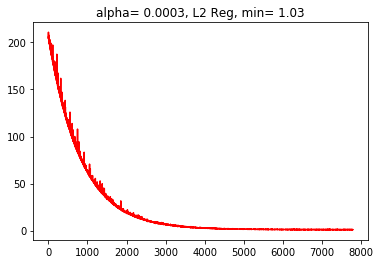

In [321]:
plt.plot(range(len(Loss_r)), Loss_r, c="r")
Lmin = "{:.2f}".format(Loss_r[-1]) 
plt.title('alpha= 0.0003,'+ " L2 Reg," + ' min= ' + Lmin)

__Алгоритм без регуляризации__

In [322]:
w_opt, Loss = sgd(X_train, y_train, w0rand , 0.008, 20000, 0.0001, False)

Text(0.5, 1.0, 'alpha= 0.0003, no Reg, min= 0.00')

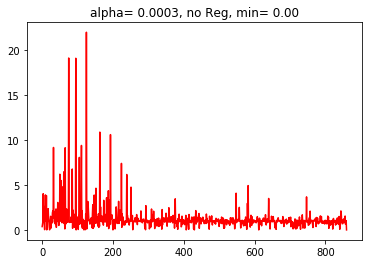

In [323]:
plt.plot(range(len(Loss)), Loss, c="r")
Lmin = "{:.2f}".format(Loss[-1]) 
plt.title('alpha= 0.0003,'+ " no Reg," + ' min= ' + Lmin)

Здесь я выведу значения $MSPE, MSE, R^2$ на контрольной выборке.

In [324]:
pred_sgd_noReg = make_pred(X_test, w_opt)
pred_sgd_L2Reg = make_pred(X_test, w_opt_r)

In [325]:
print('-------No Regularization-------')
print('MSPE %0.4f \nMSE %0.4f \nR2  %0.4f ' %(get_func(w_opt, X_test, y_test), mse(y_test, pred_sgd_noReg),
                                                 r2_score(y_test, pred_sgd_noReg)))
print('\n-------L2 Regularization-------')
print('MSPE %0.4f \nMSE %0.4f \nR2  %0.4f ' %(get_reg_func(w_opt_r, X_test, y_test), mse(y_test, pred_sgd_L2Reg), 
                                                 r2_score(y_test, pred_sgd_L2Reg)))

-------No Regularization-------
MSPE 0.9673 
MSE 1460.7989 
R2  -0.0920 

-------L2 Regularization-------
MSPE 1.0034 
MSE 1455.3644 
R2  -0.0880 


**24. (0.5 доп. балла)** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

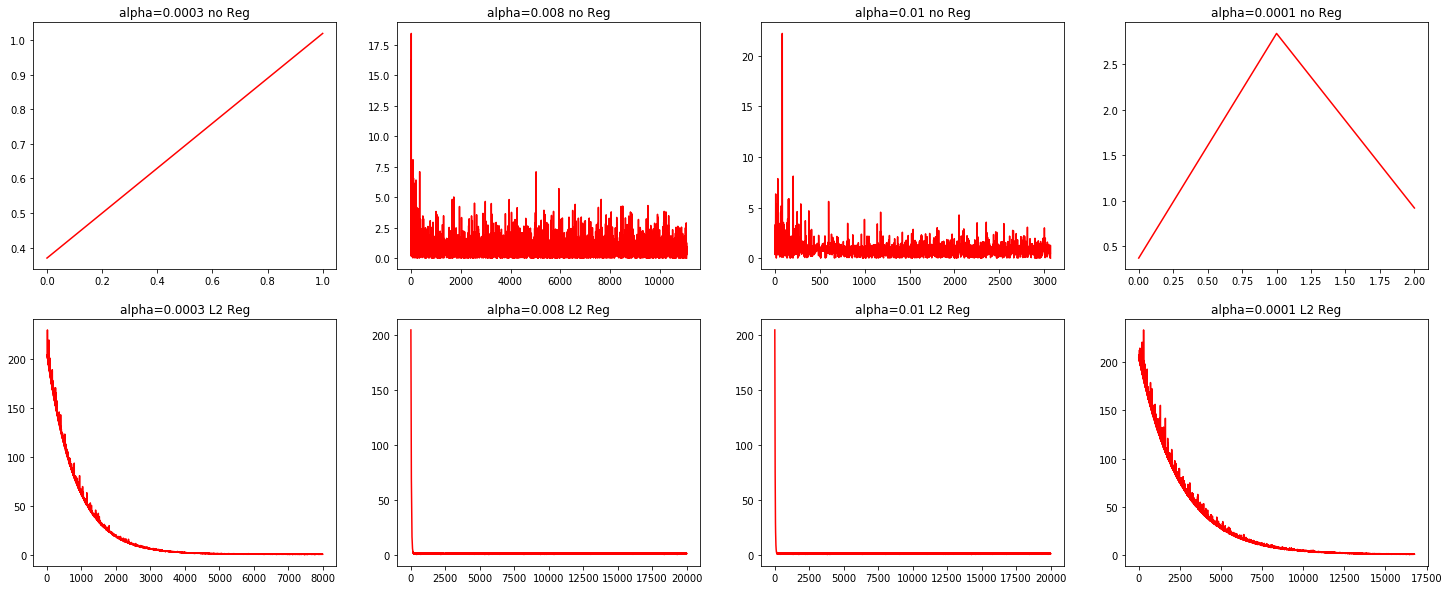

In [326]:
fig = plt.figure(figsize=(25,10))
for i, alpha in enumerate([0.0003, 0.008, 0.01, 0.0001, 0.0003, 0.008, 0.01, 0.0001]):   
    ax = fig.add_subplot(2, 4, i+1)
    if i < 4:
        w_opt, Loss = sgd(X_train, y_train, w0rand, alpha, 20000, 0.0001, False)
        ax.set_title('alpha=' + str(alpha) + " no Reg")
        plt.plot(range(len(Loss)), Loss, c="r")
    else: 
        w_opt, Loss = sgd(X_train, y_train, w0rand , alpha, 20000, 0.0001, True)
        ax.set_title('alpha=' + str(alpha) + " L2 Reg")
        plt.plot(range(len(Loss)), Loss, c="r")

__Вывод:__
    
<font color='blue'>Как и в случае выше, мы видим, что регуляризация (нижний ряд) улучшает сходимость. Алгоритм без регуляризации ведет себя нестабильно и расходится при многих значениях альфа, чего не происходит с алгоритмом с резуляризацией.  </font>

<font color='blue'>Как уже было сказано выше, возможно, регуляризация позволяет снижать колебания весов, тем самым алгоритм становится более устойчивым в смысле сходимости. </font>

**25. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?

In [327]:
LinReg_fin = LinearRegression()
LinReg_fin.fit(X_train, y_train)
w_linReg = LinReg_fin.coef_
pred_linReg = LinReg_fin.predict(X_test)

In [328]:
w_linReg.shape

(624,)

<font color='blue'>В задании просят сравнить результаты модели, обученной на полной тренировочной, а это было сделано в пункте __23__. </font>

In [329]:
print('MSPE %0.4f \nR2  %0.4f' % (get_func(w_linReg, X_test, y_test), r2_score(y_test, pred_linReg)))

MSPE 15.0615 
R2  0.0301


<font color='blue'>Результаты, полученные при обучении регрессии с функционалом $MSPE$ и его регуляризованным вариантом на полной обучающей выборке при помощи метода стохастического градиентного спуска (пункт 23): </font>

In [330]:
print('-------No Regularization-------')
print('MSPE %0.4f \nMSE %0.4f \nR2  %0.4f ' %(get_func(w_opt, X_test, y_test), mse(y_test, pred_sgd_noReg),
                                                 r2_score(y_test, pred_sgd_noReg)))
print('\n-------L2 Regularization-------')
print('MSPE %0.4f \nMSE %0.4f \nR2  %0.4f ' %(get_reg_func(w_opt_r, X_test, y_test), mse(y_test, pred_sgd_L2Reg), 
                                                 r2_score(y_test, pred_sgd_L2Reg)))

-------No Regularization-------
MSPE 0.9828 
MSE 1460.7989 
R2  -0.0920 

-------L2 Regularization-------
MSPE 1.0034 
MSE 1455.3644 
R2  -0.0880 


Результаты простой линейной регрессии, обученной по полной обучающей выборке с функционалом $MSE$ и подсчитаным для нее $MSPE$ (пункт 25):

In [331]:
print('MSPE %0.4f \nMSE %0.4f \nR2  %0.4f' % (get_func(w_linReg, X_test, y_test), mse(y_test, pred_linReg), 
                                              r2_score(y_test, pred_linReg)))

MSPE 15.0615 
MSE 1297.4159 
R2  0.0301


__Вывод:__

<font color='blue'>Как мы уже видели ранее, простая линейная регрессия с функционалом $MSE$ характеризуется проблемой переобучения, то есть показывает очень плохой результат на тестовой выборке, хуже чем модель с константой. </font>

<font color='blue'>Если же сравнить её результаты с результатами регрессии с функционалом $MSPE$, то можно увидеть, что и $MSE$ и $MSPE$ на тестовой выборке для модели, обученной градиентным спуском с функционалом $MSPE$ в тысячи раз меньше, чем у обычной регрессии. При этом $R^2$ хоть и отрицательный, но он очень близок к 0, тогда как в обычной регрессии (с функционалом $MSE$) он сильно отрицательный. </font>

<font color='blue'>Если посмотреть на получившиеся коэффициенты в двух моделях (ниже), то можно заметить, что в регрессии с функционалом $MSE$ явно наблюдается симптом переобучения - экстремальные коэффициенты, в то время как в регрессии с функционалом $MSPE$ коэффициенты стянуты к 0 (даже без регуляризации), можно предположить, что функционал $MSPE$ помогает бороться с переобучением в данном случае. </font>

<font color='blue'> Коэффициенты в регрессии с функционалом $MSE$:</font>

In [332]:
LinReg_fin.coef_

array([ 3.42854248e-01,  2.02057195e-01,  5.62868657e-01,  1.08076870e+00,
       -1.06811350e+00,  3.66831186e+00,  5.02557379e-01,  2.09213956e+00,
        1.60226259e-01,  4.04390433e+00, -7.76631939e+00,  2.50422844e+00,
       -7.61350580e+00,  1.40332190e-13,  3.97988346e-01, -5.70459443e+00,
       -1.92992952e+01, -5.81855964e+00,  3.81450365e-01,  6.02043614e+00,
       -4.02406899e+00, -1.00209540e+01, -5.90078093e-01, -2.51377990e+00,
        2.10538287e+00,  5.48322868e+00,  4.35302903e+00, -1.18179369e+01,
       -1.46156617e+00,  5.90425137e-01, -3.08778366e+00, -1.04058802e+01,
        4.65298733e+00,  1.66366809e+01, -1.37906497e+00, -5.30654847e+00,
        2.31294227e-01, -4.14821191e+00, -1.07422245e+01, -6.52258352e+00,
       -1.10428592e+01, -2.41533957e+01,  7.82732784e+00,  4.94774983e-01,
        2.03840442e-01,  6.11855798e+00, -2.74128274e+01,  3.10237532e+00,
       -5.52394624e+00,  1.17319314e+01,  3.07575403e+00, -1.10781933e+01,
       -5.34063073e-01,  

In [333]:
w_opt

array([ 2.21019505e-03,  8.23551528e-03,  3.02820837e-02,  1.75739118e-02,
       -5.83348075e-03,  2.47082086e-02,  1.54899325e-02,  3.10307786e-02,
        2.45951140e-02,  1.34981293e-02,  1.79665460e-02,  1.61675651e-02,
        9.31262991e-03,  2.38578238e-02,  7.41348857e-05,  2.19620306e-02,
        1.62049433e-02,  1.68145719e-02,  2.30710165e-02,  1.00650851e-02,
        2.01200129e-02,  2.31082903e-02,  3.00882326e-03,  2.25477990e-03,
        3.38154342e-02,  2.22448582e-02,  1.10301605e-02,  5.41853686e-03,
        1.65353723e-02,  3.94887443e-03,  1.98667519e-02,  2.48698050e-02,
        1.25151798e-02,  2.97007562e-02,  3.02866410e-02,  8.00716168e-04,
        3.23808995e-02,  3.18742331e-02,  3.42237650e-02,  2.94527147e-02,
        1.07706318e-02,  2.79442540e-02,  1.32004721e-02,  2.30671658e-02,
        1.09497146e-03,  3.65263549e-03,  5.60661103e-03,  7.24903683e-03,
        1.86387148e-02,  6.12690967e-03,  3.18858993e-02,  2.47142766e-02,
        1.56887318e-02,  

In [334]:
w_opt_r

array([ 7.05925757e-03,  2.76061401e-03,  1.81293868e-02, -1.37331567e-02,
       -8.92371372e-03,  2.08996203e-02,  6.64490003e-03,  2.53322576e-02,
        3.54770790e-03,  3.42271331e-03,  4.82811178e-03,  3.14355354e-03,
        2.57130916e-03,  6.34739333e-03,  3.91918936e-05,  5.84441828e-03,
        4.28111531e-03,  4.46646410e-03,  6.15153753e-03,  2.50968742e-03,
        5.37113543e-03,  6.14797932e-03,  1.06316302e-03,  6.49740089e-04,
        8.70085904e-03,  5.67500637e-03, -4.35685049e-03,  1.15402919e-03,
        3.46998745e-03,  1.08624111e-03,  5.00063174e-03,  6.49423620e-03,
        3.21103994e-03,  7.90244092e-03,  8.03013333e-03,  1.59409219e-04,
        8.61631716e-03,  8.36256327e-03,  8.83498405e-03,  7.79858139e-03,
        2.86812751e-03,  7.43459140e-03,  3.43069471e-03,  7.01657083e-03,
       -3.45885397e-05,  3.43193477e-04,  1.49164340e-03,  1.93599146e-03,
        4.97555571e-03,  1.62902741e-03,  8.50677547e-03,  6.58012512e-03,
        4.03317781e-03,  

Здесь вы можете поделиться своими мыслями по поводу этого задания.

_Честно говоря. Задание достаточно интересное, но сложное. Однако выполняя его я научился искать информацию, и что не маловажно пользоваться документацией к библиотекам. Задача полностью направлена на практическую реализацию, что на мой взгляд тоже не маловажно. Задания построены таким образом, как буд-то это реальные задачи из жизни, без всяких там нажми туда, сделай это и получи результат. Тут надо головой подумать и покопаться в интернете, чтобы решить задачу и возникшие в ходе ее решения проблемы._

А здесь — вставить вашу любимую картинку.

![](https://naked-science.ru/wp-content/uploads/2016/11/field_image_26bfb2160bb56bc24bacf8d3c489e9ad.jpg)